# key words
- datasets: make_blobs
- cluster: KMeans, MiniBatchKMeans
- metrics: silhouette_samples, silhouette_score, normalized_mutual_info_score, mutual_info_score, pairwise

# silhouette distance
Silhouette distance is the ratio of the difference between the in-cluster dissimilarity and the closest out-of-cluster
dissimilarity, and the maximum of these two values. It can be thought of as a measure of how separate the clusters are.

kmeans centers:
[[ 2.62807448 -8.66888708]
 [-1.02946966  5.4916806 ]
 [-5.89923706  8.84888718]]
minibatch kmeans centers:
[[ 2.56709041 -8.71945455]
 [-5.82568339  8.67099562]
 [-1.01580743  5.54692358]]
diag_distance: [0.079222   5.75427755 5.89498504]
kmeans_norm_score = 0.8338
kmeans_unnorm_score = 0.9160
minibatch_kmeans_norm_score = 0.8338
minibatch_kmeans_unnorm_score = 0.9160


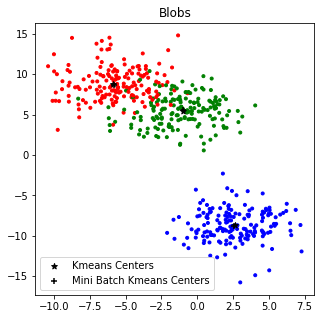

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, normalized_mutual_info_score, mutual_info_score, pairwise

X_blobs3, y_blobs3 = make_blobs(500, centers=3, cluster_std=2)

# kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs3)
kmeans_centers = kmeans.cluster_centers_
print("kmeans centers:\n%s" % kmeans_centers)

# minibatch kmeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=3)
minibatch_kmeans.fit(X_blobs3)
minibatch_kmeans_centers = minibatch_kmeans.cluster_centers_
print("minibatch kmeans centers:\n%s" % minibatch_kmeans_centers)

# pairwise distances (euclid distances)
diag_distance = np.diag(pairwise.pairwise_distances(kmeans_centers, minibatch_kmeans_centers))
print("diag_distance: %s" % diag_distance)

# kmeans normalized
kmeans_norm_score = normalized_mutual_info_score(y_blobs3, kmeans.labels_, average_method='arithmetic')
print("kmeans_norm_score = %.4f" % kmeans_norm_score)

# kmeans unnormalized
kmeans_unnorm_score = mutual_info_score(y_blobs3, kmeans.labels_)
print("kmeans_unnorm_score = %.4f" % kmeans_unnorm_score)

# minibatch kmeans normalized
minibatch_kmeans_norm_score = normalized_mutual_info_score(y_blobs3, kmeans.labels_, average_method='arithmetic')
print("minibatch_kmeans_norm_score = %.4f" % minibatch_kmeans_norm_score)

# minibatch kmeans unnormalized
minibatch_kmeans_unnorm_score = mutual_info_score(y_blobs3, kmeans.labels_)
print("minibatch_kmeans_unnorm_score = %.4f" % minibatch_kmeans_unnorm_score)


# plot
plt.figure(figsize=(5, 5))
plt.subplot(111, title="Blobs")
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X_blobs3[:, 0], X_blobs3[:, 1], color=rgb[y_blobs3], marker='.')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], color='k', marker='*', label='Kmeans Centers')
plt.scatter(minibatch_kmeans_centers[:, 0], minibatch_kmeans_centers[:, 1], color='k', marker='+', label='Mini Batch Kmeans Centers')
plt.legend(loc='best')

(array([ 5.,  6.,  5., 10., 10., 10.,  7., 15., 12., 16., 31., 43., 38.,
        55., 59., 27., 10., 30., 39., 72.]),
 array([-0.00759891,  0.0346851 ,  0.07696912,  0.11925313,  0.16153715,
         0.20382116,  0.24610518,  0.28838919,  0.33067321,  0.37295722,
         0.41524124,  0.45752525,  0.49980927,  0.54209328,  0.5843773 ,
         0.62666131,  0.66894533,  0.71122934,  0.75351336,  0.79579737,
         0.83808139]),
 <a list of 20 Patch objects>)

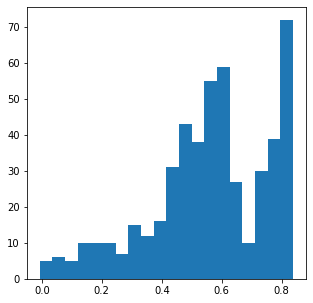

In [2]:
silhouette_distances = silhouette_samples(X_blobs3, kmeans.labels_)
score = silhouette_score(X_blobs3, kmeans.labels_)

plt.figure(figsize=(5, 5))
plt.hist(silhouette_distances, bins=20)

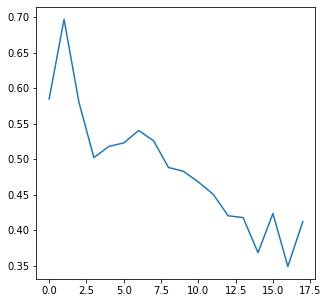

In [3]:
X_blobs10, y_blobs10 = make_blobs(500, centers=10)
silhouette_avgs = []
for k in range(2, 20):
    kmeans_tmp = KMeans(n_clusters=k)
    kmeans_tmp.fit(X_blobs10)
    silhouette_avgs.append(silhouette_score(X_blobs10, kmeans_tmp.labels_))

plt.figure(figsize=(5, 5))
plt.plot(silhouette_avgs)